
# Decision Trees and Random Forests in Python

This is the code for the tree methods in Python. We use the same dataset, 'titanic_cleaned'.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('titanic_cleaned.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [4]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Decision Trees

We'll start just by training a single decision tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       167
           1       0.63      0.67      0.65       100

   micro avg       0.73      0.73      0.73       267
   macro avg       0.71      0.72      0.71       267
weighted avg       0.73      0.73      0.73       267



In [14]:
print(confusion_matrix(y_test,predictions))

[[127  40]
 [ 33  67]]


## Random Forests

Now let's compare the decision tree model to a random forest.

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
rfc_pred = rfc.predict(X_test)

In [17]:
print(confusion_matrix(y_test,rfc_pred))

[[145  22]
 [ 33  67]]


In [18]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       167
           1       0.75      0.67      0.71       100

   micro avg       0.79      0.79      0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



## Comparing Machine Learning Algorithms consistently

Now let's compare multiple machine learning algorithms. We will compare 4 algorithms - Logistic Regression, Random Forest, KNN (K-nearest neighbor), and Naive Bayes.

In [19]:
# import different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# get accuracy score
from sklearn.metrics import accuracy_score

In [20]:
# prepare models
models=[]
models.append(('LR',LogisticRegression()))
models.append(('RFC',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))

In [39]:
# evaluate each model in turn
for name, model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    ac_score=accuracy_score(y_test,predictions)
    msg="%s: %f" % (name, ac_score)
    print(msg)  

LR: 0.805243
RFC: 0.801498
KNN: 0.606742
NB: 0.790262


C:\datascience\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
from sklearn.metrics import roc_curve, auc

In [42]:
# Logistic Regression 
lr=LogisticRegression()
lr.fit(X_train, y_train)
lr_predict_probs=lr.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, lr_thr=roc_curve(y_test,lr_predict_probs)
lr_roc_auc=auc(lr_fpr,lr_tpr)

# Random Forest
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict_probs=rfc.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, rfc_thr=roc_curve(y_test,rfc_predict_probs)
rfc_roc_auc=auc(rfc_fpr,rfc_tpr)

# K nearst neighbors
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict_probs=knn.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, knn_thr=roc_curve(y_test,knn_predict_probs)
knn_roc_auc=auc(knn_fpr,knn_tpr)

# Naive Bayes
nb=GaussianNB()
nb.fit(X_train, y_train)
nb_predict_probs=nb.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, nb_thr=roc_curve(y_test,nb_predict_probs)
nb_roc_auc=auc(nb_fpr,nb_tpr)

C:\datascience\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\datascience\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


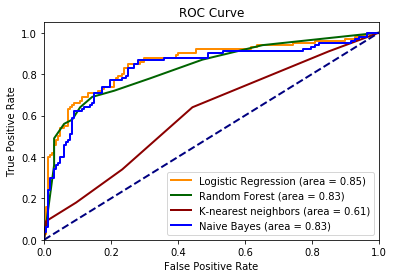

In [43]:
plt.figure()
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot(rfc_fpr, rfc_tpr, color='darkgreen', lw=2, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='darkred', lw=2, label='K-nearest neighbors (area = %0.2f)' % knn_roc_auc)
plt.plot(nb_fpr, nb_tpr, color='blue', lw=2, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Great Job!